In [1]:
# dem_tile = '/vsicurl/https://copernicus-dem-30m.s3.amazonaws.com/Copernicus_DSM_COG_10_N41_00_W088_00_DEM/Copernicus_DSM_COG_10_N41_00_W088_00_DEM.tif'
import os
import numpy as np
import rasterio
from pathlib import Path 
from shapely.geometry import GeometryCollection, box
from asf_tools.dem import prepare_dem_vrt

accumulation_threshold = 1000
dem_dir = Path("C:/DHI/HAND/DEM/FABDEM")
print(f"ACC: {accumulation_threshold}")

fileList = os.listdir(dem_dir)


# for filename in fileList:
filename = fileList[0][:-4]
print(filename)

dem_tile = dem_dir / f"{filename}.tif"
out_dir = Path(f"C:/DHI/HAND/outputs_ACC_{accumulation_threshold}") 
out_dir.mkdir(exist_ok=True, parents=True)

tmp_dir =  out_dir / "tmp"
tmp_dir.mkdir(exist_ok=True, parents=True)

with rasterio.open(dem_tile) as dem:
        dem_bounds = dem.bounds
        dem_meta = dem.meta

dem_geometry = box(*dem_bounds)
aoi_buffered = GeometryCollection([dem_geometry.buffer(0.5)])

# hydroBASIN
import geopandas as gpd
hydroBASIN = gpd.read_file("hydroBASIN/hybas_sa_lev05_v1c\hybas_sa_lev05_v1c.shp")
basins =  hydroBASIN[hydroBASIN.geometry.intersects(aoi_buffered)]


<>:36: SyntaxWarning: invalid escape sequence '\h'
<>:36: SyntaxWarning: invalid escape sequence '\h'
C:\Users\puzh\AppData\Local\Temp\ipykernel_7824\1599464012.py:36: SyntaxWarning: invalid escape sequence '\h'
  hydroBASIN = gpd.read_file("hydroBASIN/hybas_sa_lev05_v1c\hybas_sa_lev05_v1c.shp")


ACC: 1000
N08W074_FABDEM_V1-2


In [2]:
dem_bounds

BoundingBox(left=-74.00013888888888, bottom=8.000138888888891, right=-73.00013888888888, top=9.00013888888889)

In [3]:
hydroBASIN

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,6050000010,0,6050000010,6050000010,0.0,0.0,72363.7,72363.7,61100,0,1,0,1,"MULTIPOLYGON (((-75.73472 10.17083, -75.75746 ..."
1,6050000740,0,6050000740,6050000740,0.0,0.0,17944.3,260739.0,61201,0,0,1,2,"POLYGON ((-74.075 9.59167, -74.07254 9.59131, ..."
2,6050068100,6050000740,6050000740,6050000740,276.9,276.9,17105.5,17105.5,61202,0,0,2,3,"POLYGON ((-74.95833 8.1375, -74.95777 8.12279,..."
3,6050068110,6050000740,6050000740,6050000740,277.1,277.1,610.1,225687.7,61203,0,0,1,4,"POLYGON ((-74.64167 9.04583, -74.63953 9.04519..."
4,6050070260,6050068110,6050000740,6050000740,315.1,315.1,61901.9,61901.9,61204,0,0,2,5,"MULTIPOLYGON (((-74.75417 7.02083, -74.75295 7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,6050041130,0,6050041130,6050041130,0.0,0.0,3799.6,3799.6,65308,2,0,1,492,"POLYGON ((-65.37083 -40.6375, -65.37326 -40.63..."
492,6050041170,0,6050041170,6050041170,0.0,0.0,4094.7,4094.7,66401,2,0,1,493,"POLYGON ((-68.55833 -27.12083, -68.55777 -27.1..."
493,6050041200,0,6050041200,6050041200,0.0,0.0,12058.3,12058.3,65102,2,0,1,494,"POLYGON ((-65.16667 -37.2375, -65.16667 -37.23..."
494,6050041310,0,6050041310,6050041310,0.0,0.0,3491.6,3491.6,65304,2,0,1,495,"POLYGON ((-66.80833 -42.3125, -66.80923 -42.31..."


In [54]:
basin = hydroBASIN[hydroBASIN.HYBAS_ID==6050069460]

# FABDEM Tiles Geojson

tiles = gpd.read_file("data/FABDEM_v1-2_tiles.geojson")
basin_geo = GeometryCollection([basin.geometry])[0]
tiles_filtered =  tiles[tiles.geometry.intersects(basin_geo)]

print('zipfile_name', tiles_filtered.zipfile_name.unique())
tiles_filtered

zipfile_name ['N00W080-N10W070_FABDEM_V1-2.zip']


,tile_name,file_name,zipfile_name,geometry
13923,N008W075,N008W075_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-75 8, -75 9, -74 9, -74 8, -75 8))"
13924,N008W074,N008W074_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-74 8, -74 9, -73 9, -73 8, -74 8))"
14058,N007W075,N007W075_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-75 7, -75 8, -74 8, -74 7, -75 7))"
14059,N007W074,N007W074_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-74 7, -74 8, -73 8, -73 7, -74 7))"
14060,N007W073,N007W073_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-73 7, -73 8, -72 8, -72 7, -73 7))"
14176,N006W075,N006W075_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-75 6, -75 7, -74 7, -74 6, -75 6))"
14177,N006W074,N006W074_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-74 6, -74 7, -73 7, -73 6, -74 6))"
14178,N006W073,N006W073_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-73 6, -73 7, -72 7, -72 6, -73 6))"


In [49]:
tiles_filtered.zipfile_name.unique()

array(['N00W080-N10W070_FABDEM_V1-2.zip'], dtype=object)

In [51]:
basin.geometry

492    POLYGON ((-68.55833 -27.12083, -68.55777 -27.1...
Name: geometry, dtype: geometry

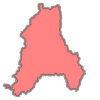

In [46]:
GeometryCollection([basin.geometry])[0]

<Axes: >

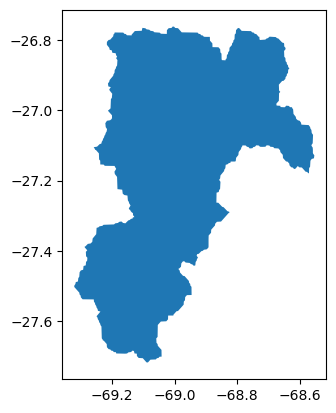

In [52]:
basin.geometry.plot()

In [20]:
import geopandas as gpd
hydroBASIN = gpd.read_file("hydroBASIN/hybas_sa_lev05_v1c\hybas_sa_lev05_v1c.shp")

columbia = box(-75, 8, -73, 10)
basins =  hydroBASIN[hydroBASIN.geometry.intersects(columbia)]
basins

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\puzh\AppData\Local\Temp\ipykernel_32684\3617066111.py:2: SyntaxWarning: invalid escape sequence '\h'
  hydroBASIN = gpd.read_file("hydroBASIN/hybas_sa_lev05_v1c\hybas_sa_lev05_v1c.shp")


,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
1,6050000740,0,6050000740,6050000740,0.0,0.0,17944.3,260739.0,61201,0,0,1,2,"POLYGON ((-74.075 9.59167, -74.07254 9.59131, ..."
2,6050068100,6050000740,6050000740,6050000740,276.9,276.9,17105.5,17105.5,61202,0,0,2,3,"POLYGON ((-74.95833 8.1375, -74.95777 8.12279,..."
3,6050068110,6050000740,6050000740,6050000740,277.1,277.1,610.1,225687.7,61203,0,0,1,4,"POLYGON ((-74.64167 9.04583, -74.63953 9.04519..."
4,6050070260,6050068110,6050000740,6050000740,315.1,315.1,61901.9,61901.9,61204,0,0,2,5,"MULTIPOLYGON (((-74.75417 7.02083, -74.75295 7..."
5,6050070270,6050068110,6050000740,6050000740,315.3,315.3,1690.4,163175.3,61205,0,0,1,6,"POLYGON ((-73.94583 8.9375, -73.94548 8.91424,..."
6,6050069460,6050070270,6050000740,6050000740,398.8,398.8,25043.0,139272.1,61207,0,0,1,7,"POLYGON ((-72.97917 7.62083, -72.97917 7.61667..."
7,6050069430,6050070270,6050000740,6050000740,399.0,399.0,22211.6,22211.6,61206,0,0,2,8,"POLYGON ((-73.00417 9.75, -73.00482 9.74264, -..."
10,6050000750,0,6050000750,6050000750,0.0,0.0,53087.0,53087.0,61301,0,1,0,11,"MULTIPOLYGON (((-74.28056 11.10833, -74.2838 1..."
11,6050001940,0,6050001940,6050001940,0.0,0.0,27553.5,27553.5,61302,0,0,1,12,"POLYGON ((-71.9125 8.1875, -71.91004 8.18714, ..."


In [25]:
basin = hydroBASIN[hydroBASIN.HYBAS_ID==6050000010]

<Axes: >

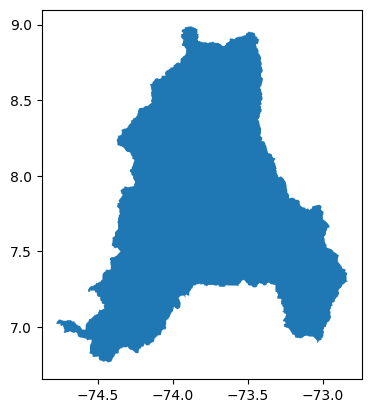

In [38]:
basin.geometry.plot()

In [ ]:
"""Prepare a Copernicus GLO-30 DEM virtual raster (VRT) covering a given geometry"""
from pathlib import Path
from typing import Union

from osgeo import gdal, ogr
from shapely.geometry.base import BaseGeometry

from asf_tools import vector
from asf_tools.util import GDALConfigManager

DEM_GEOJSON = '/vsicurl/https://asf-dem-west.s3.amazonaws.com/v2/cop30-2021.geojson'

gdal.UseExceptions()
ogr.UseExceptions()


def prepare_fabdem_vrt(vrt: Union[str, Path], geometry: Union[ogr.Geometry, BaseGeometry]):
    """Create a DEM mosaic VRT covering a given geometry

    The DEM mosaic is assembled from the Copernicus GLO-30 DEM tiles that intersect the geometry.

    Note: `asf_tools` does not currently support geometries that cross the antimeridian.

    Args:
        vrt: Path for the output VRT file
        geometry: Geometry in EPSG:4326 (lon/lat) projection for which to prepare a DEM mosaic

    """
    with GDALConfigManager(GDAL_DISABLE_READDIR_ON_OPEN='EMPTY_DIR'):
        if isinstance(geometry, BaseGeometry):
            geometry = ogr.CreateGeometryFromWkb(geometry.wkb)

        min_lon, max_lon, _, _ = geometry.GetEnvelope()
        if min_lon < -160. and max_lon > 160.:
            raise ValueError(f'asf_tools does not currently support geometries that cross the antimeridian: {geometry}')

        tile_features = vector.get_features(DEM_GEOJSON)
        if not vector.get_property_values_for_intersecting_features(geometry, tile_features):
            raise ValueError(f'Copernicus GLO-30 DEM does not intersect this geometry: {geometry}')

        dem_file_paths = vector.intersecting_feature_properties(geometry, tile_features, 'file_path')

        gdal.BuildVRT(str(vrt), dem_file_paths)


In [ ]:
buffered_dem_vrt = Path(dem_tile).name.replace('.tif', '_buffered.vrt')
prepare_dem_vrt(buffered_dem_vrt, aoi_buffered)

hand_raster_buffered = tmp_dir / f'HAND_ACC{accumulation_threshold}_buffered.tif'

from calculate import calculate_hand_for_basins
calculate_hand_for_basins(hand_raster_buffered, aoi_buffered, buffered_dem_vrt, acc_thresh=accumulation_threshold)

# Crop out buffered HAND to the original DEM tile size
with rasterio.open(hand_raster_buffered) as sds:
    window = rasterio.windows.from_bounds(*dem_bounds, sds.transform)
    out_pixels = sds.read(
        1, window=window, out_shape=(dem_meta['height'], dem_meta['width']),
        resampling=rasterio.enums.Resampling.bilinear
    )


# # Mask the ocean pixels as identified in the WBM auxiliary DEM files
# wmb_tile = dem_tile.replace('DEM/Copernicus', 'DEM/AUXFILES/Copernicus')
# wmb_tile = wmb_tile.replace('_DEM.tif', f'_WBM.tif')

# with rasterio.open(wmb_tile) as wbm:
#     wbm_pixels = wbm.read(1)

# out_pixels = np.ma.masked_where(wbm_pixels == 1, out_pixels)


# Write out the final HAND tile
from calculate import write_cog

hand_raster = out_dir/ f'{filename}_HAND_ACC{accumulation_threshold}.tif'
write_cog(hand_raster, out_pixels, transform=dem.transform.to_gdal(), epsg_code=dem.crs.to_epsg())

In [20]:
import os, time
import numpy as np
from tqdm import tqdm
import rasterio
from pathlib import Path 
from shapely.geometry import GeometryCollection, box
# from asf_tools.dem import prepare_dem_vrt

import geopandas as gpd

acc_thresh = 100 # accumulation threshold
fabdem_path = Path("data/FABDEM/sa")

hand_path = Path(f"hand_acc{acc_thresh}")
hand_path.mkdir(exist_ok=True, parents=True)

# Italy, northern Algeria, Kenya, Uganda, South Africa, Australia 
basin_lv5 = gpd.read_file("data\hydroBASIN\hybas_sa_lev05_v1c.zip").to_crs(epsg=4326)
basin_lv6 = gpd.read_file("data\hydroBASIN\hybas_sa_lev06_v1c.zip").to_crs(epsg=4326)
basinIdList = [
    6050294360
    ,6050287830
    ,6050266740
    ,6050266880
    ,6050491720
    ,6050532210
    ,6050315920
    ,6050315910
] # 6050069430

basin_lv5_flt = basin_lv5[basin_lv5.HYBAS_ID.isin(basinIdList)]
print(basin_lv5_flt)

basins_lv6_within_lv5 = gpd.sjoin(basin_lv6, basin_lv5, how='left', predicate='within')
print(basins_lv6_within_lv5, 'basins_lv6_within_lv5')
print('geometry' in basin_lv6.columns)

<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:19: SyntaxWarning: invalid escape sequence '\h'
<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:19: SyntaxWarning: invalid escape sequence '\h'
C:\Users\puzh\AppData\Local\Temp\ipykernel_3928\4205133077.py:18: SyntaxWarning: invalid escape sequence '\h'
  basin_lv5 = gpd.read_file("data\hydroBASIN\hybas_sa_lev05_v1c.zip").to_crs(epsg=4326)
C:\Users\puzh\AppData\Local\Temp\ipykernel_3928\4205133077.py:19: SyntaxWarning: invalid escape sequence '\h'
  basin_lv6 = gpd.read_file("data\hydroBASIN\hybas_sa_lev06_v1c.zip").to_crs(epsg=4326)


       HYBAS_ID   NEXT_DOWN   NEXT_SINK    MAIN_BAS  DIST_SINK  DIST_MAIN  \
122  6050294360  6050280410  6050007000  6050007000     1526.5     1526.5   

     SUB_AREA   UP_AREA  PFAF_ID  ENDO  COAST  ORDER  SORT  \
122  378743.9  378762.4    62292     0      0      2   123   

                                              geometry  
122  MULTIPOLYGON (((-63.9375 -8.33333, -63.93871 -...  
      HYBAS_ID_left  NEXT_DOWN_left  NEXT_SINK_left  MAIN_BAS_left  \
0        6060000010               0      6060000010     6060000010   
1        6060000200               0      6060000200     6060000200   
2        6060000210               0      6060000210     6060000210   
3        6060000240               0      6060000240     6060000240   
4        6060000250               0      6060000250     6060000250   
...             ...             ...             ...            ...   
1941     6060043520               0      6060043520     6060043520   
1942     6060043660               0      60600

In [24]:
basinIdList = [
    6050294360
    ,6050287830
    ,6050266740
    ,6050266880
    ,6050491720
    ,6050532210
    ,6050315920
    ,6050315910
] # 6050069430

basin_lv5_flt = basin_lv5[basin_lv5.HYBAS_ID.isin(basinIdList)]
print(basin_lv5_flt)

       HYBAS_ID   NEXT_DOWN   NEXT_SINK    MAIN_BAS  DIST_SINK  DIST_MAIN  \
122  6050294360  6050280410  6050007000  6050007000     1526.5     1526.5   
137  6050287830  6050294270  6050007000  6050007000     1937.8     1937.8   
141  6050266740  6050287820  6050007000  6050007000     2156.8     2156.8   
142  6050266880  6050287820  6050007000  6050007000     2156.8     2156.8   
146  6050491720  6050425540  6050007000  6050007000     2612.2     2612.2   
147  6050532210  6050491730  6050007000  6050007000     2867.9     2867.9   
149  6050315920  6050266740  6050007000  6050007000     3493.5     3493.5   
150  6050315910  6050266740  6050007000  6050007000     3493.7     3493.7   

     SUB_AREA    UP_AREA  PFAF_ID  ENDO  COAST  ORDER  SORT  \
122  378743.9   378762.4    62292     0      0      2   123   
137  270156.3   270156.3    62294     0      0      2   138   
141  514725.6  1233304.8    62297     0      0      1   142   
142  189721.5   189725.5    62296     0      0      2 

<Axes: >

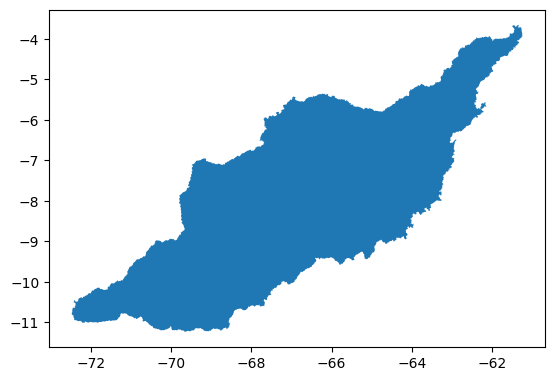

In [7]:
basin_lv5_flt.geometry.plot()

In [25]:
basin_lv6[basin_lv6.geometry.within(basin_lv5_flt.geometry)]

C:\Users\puzh\AppData\Local\Temp\ipykernel_3928\1754883997.py:1: UserWarning: The indices of the left and right GeoSeries' are not equal, and therefore they will be aligned (reordering and/or introducing missing values) before executing the operation. If this alignment is the desired behaviour, you can silence this warning by passing 'align=True'. If you don't want alignment and protect yourself of accidentally aligning, you can pass 'align=False'.
  basin_lv6[basin_lv6.geometry.within(basin_lv5_flt.geometry)]


,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry


In [26]:
import time
from datetime import datetime

# Method 1: Using the time module
current_time_seconds = time.time()
current_time_millis_time = int(current_time_seconds * 1000)
current_time_millis_time

1723051704837

In [28]:
hand_100_ids = [
  "6050000010",
  "6050000740",
  "6050000750",
  "6050001940",
  "6050001950",
  "6050003210",
  "6050003220",
  "6050003680",
  "6050003690",
  "6050004060",
  "6050004070",
  "6050004470",
  "6050004480",
  "6050004870",
  "6050004880",
  "6050005180",
  "6050005190",
  "6050005490",
  "6050005500",
  "6050006470",
  "6050006480",
  "6050006540",
  "6050007000",
  "6050007010",
  "6050007050",
  "6050007060",
  "6050007090",
  "6050007100",
  "6050007240",
  "6050007250",
  "6050007650",
  "6050007660",
  "6050007950",
  "6050007960",
  "6050008320",
  "6050008620",
  "6050008630",
  "6050009220",
  "6050009230",
  "6050009250",
  "6050009260",
  "6050009430",
  "6050009440",
  "6050009760",
  "6050009770",
  "6050010100",
  "6050010110",
  "6050010510",
  "6050010520",
  "6050010670",
  "6050010680",
  "6050011240",
  "6050011250",
  "6050011780",
  "6050011790",
  "6050011890",
  "6050011900",
  "6050012020",
  "6050012030",
  "6050012280",
  "6050012290",
  "6050012370",
  "6050012380",
  "6050012580",
  "6050012590",
  "6050012790",
  "6050012800",
  "6050013420",
  "6050013430",
  "6050013750",
  "6050013760",
  "6050014330",
  "6050015560",
  "6050015570",
  "6050015940",
  "6050015950",
  "6050016720",
  "6050016730",
  "6050016760",
  "6050016770",
  "6050016970",
  "6050016980",
  "6050017370",
  "6050017380",
  "6050017390",
  "6050017530",
  "6050017540",
  "6050017970",
  "6050017980",
  "6050018280",
  "6050018290",
  "6050018850",
  "6050018860",
  "6050019090",
  "6050068100",
  "6050068110",
  "6050069430",
  "6050069460",
  "6050070260",
  "6050070270",
  "6050075390",
  "6050075410",
  "6050079250",
  "6050079280",
  "6050079310",
  "6050079390",
  "6050079860",
  "6050079970",
  "6050080920",
  "6050081020",
  "6050083060",
  "6050083130",
  "6050084040",
  "6050084130",
  "6050084190",
  "6050084230",
  "6050084380",
  "6050084460",
  "6050084750",
  "6050084790",
  "6050089660",
  "6050089740",
  "6050099010",
  "6050099060",
  "6050102250",
  "6050102330",
  "6050104180",
  "6050104230",
  "6050113570",
  "6050113660",
  "6050121450",
  "6050121460",
  "6050126730",
  "6050126850",
  "6050129600",
  "6050129810",
  "6050130490",
  "6050130600",
  "6050134450",
  "6050134460",
  "6050134790",
  "6050134890",
  "6050134940",
  "6050134950",
  "6050136450",
  "6050136480",
  "6050137270",
  "6050137380",
  "6050143380",
  "6050143540",
  "6050150580",
  "6050150590",
  "6050154590",
  "6050154700",
  "6050156750",
  "6050156880",
  "6050160730",
  "6050160900",
  "6050207660",
  "6050207670",
  "6050224360",
  "6050224470",
  "6050237120",
  "6050237360",
  "6050238630",
  "6050238750",
  "6050239720",
  "6050239820",
  "6050241250",
  "6050241280",
  "6050247260",
  "6050247270",
  "6050250180",
  "6050250260",
  "6050261280",
  "6050261380",
  "6050262110",
  "6050262220",
  "6050262360",
  "6050262490",
  "6050263530",
  "6050263540",
  "6050266340",
  "6050266470",
  "6050272340",
  "6050272470",
  "6050280400",
  "6050280410",
  "6050285930",
  "6050285990",
  "6050287820",
  "6050294270",
  "6050298170",
  "6050298270",
  "6050325720",
  "6050325820",
  "6050334790",
  "6050334800",
  "6050337190",
  "6050337320",
  "6050344540",
  "6050344660",
  "6050345000",
  "6050345180",
  "6050372330",
  "6050372340",
  "6050384210",
  "6050384320",
  "6050389860",
  "6050389870",
  "6050401890",
  "6050401900",
  "6050405310",
  "6050405320",
  "6050408040",
  "6050408150",
  "6050411440",
  "6050411450",
  "6050425540",
  "6050425550",
  "6050441200",
  "6050441330",
  "6050442950",
  "6050443080",
  "6050449170",
  "6050449500",
  "6050450410",
  "6050450420",
  "6050451380",
  "6050451390",
  "6050457830",
  "6050457840",
  "6050458930",
  "6050459050",
  "6050466150",
  "6050466270",
  "6050476790",
  "6050476800",
  "6050481670",
  "6050481680",
  "6050483010",
  "6050483020",
  "6050491730",
  "6050506420",
  "6050506430",
  "6050510750",
  "6050510890",
  "6050527670",
  "6050527680",
  "6050532200",
  "6050532340",
  "6050532350",
  "6050546240",
  "6050546360",
  "6050550960",
  "6050551090",
  "6050562010",
  "6050562020",
  "6050565970",
  "6050565980",
  "6050594780",
  "6050594790",
  "6050595200",
  "6050595210",
  "6050622980",
  "6050622990",
  "6050624770",
  "6050624870",
  "6050639910",
  "6050639920",
  "6050649360",
  "6050649500",
  "6050652910",
  "6050653020",
  "6050667090",
  "6050667100",
  "6050670380",
  "6050670510",
  "6050674150",
  "6050674210",
  "6050675090",
  "6050675150",
  "6050680380"
]

flow_acc_ids = [
  "6050000010",
  "6050000740",
  "6050000750",
  "6050001940",
  "6050001950",
  "6050003210",
  "6050003220",
  "6050003680",
  "6050003690",
  "6050004060",
  "6050004070",
  "6050004470",
  "6050004480",
  "6050004870",
  "6050004880",
  "6050005180",
  "6050005190",
  "6050005490",
  "6050005500",
  "6050006470",
  "6050006480",
  "6050006540",
  "6050007000",
  "6050007010",
  "6050007050",
  "6050007060",
  "6050007090",
  "6050007100",
  "6050007240",
  "6050007250",
  "6050007650",
  "6050007660",
  "6050007950",
  "6050007960",
  "6050008320",
  "6050008620",
  "6050008630",
  "6050009220",
  "6050009230",
  "6050009250",
  "6050009260",
  "6050009430",
  "6050009440",
  "6050009760",
  "6050009770",
  "6050010100",
  "6050010110",
  "6050010510",
  "6050010520",
  "6050010670",
  "6050010680",
  "6050011240",
  "6050011250",
  "6050011780",
  "6050011790",
  "6050011890",
  "6050011900",
  "6050012020",
  "6050012030",
  "6050012280",
  "6050012290",
  "6050012370",
  "6050012380",
  "6050012580",
  "6050012590",
  "6050012790",
  "6050012800",
  "6050013420",
  "6050013430",
  "6050013750",
  "6050013760",
  "6050014330",
  "6050015560",
  "6050015570",
  "6050015940",
  "6050015950",
  "6050016720",
  "6050016730",
  "6050016760",
  "6050016770",
  "6050016970",
  "6050016980",
  "6050017370",
  "6050017380",
  "6050017390",
  "6050017530",
  "6050017540",
  "6050017970",
  "6050017980",
  "6050018280",
  "6050018290",
  "6050018850",
  "6050018860",
  "6050019090",
  "6050068100",
  "6050068110",
  "6050069430",
  "6050069460",
  "6050070260",
  "6050070270",
  "6050075390",
  "6050075410",
  "6050079250",
  "6050079280",
  "6050079310",
  "6050079390",
  "6050079860",
  "6050079970",
  "6050080920",
  "6050081020",
  "6050083060",
  "6050083130",
  "6050084040",
  "6050084130",
  "6050084190",
  "6050084230",
  "6050084380",
  "6050084460",
  "6050084750",
  "6050084790",
  "6050089660",
  "6050089740",
  "6050099010",
  "6050099060",
  "6050102250",
  "6050102330",
  "6050104180",
  "6050104230",
  "6050113570",
  "6050113660",
  "6050121450",
  "6050121460",
  "6050126730",
  "6050126850",
  "6050129600",
  "6050129810",
  "6050130490",
  "6050130600",
  "6050134450",
  "6050134460",
  "6050134790",
  "6050134890",
  "6050134940",
  "6050134950",
  "6050136450",
  "6050136480",
  "6050137270",
  "6050137380",
  "6050143380",
  "6050143540",
  "6050150580",
  "6050150590",
  "6050154590",
  "6050154700",
  "6050156750",
  "6050156880",
  "6050160730",
  "6050160900",
  "6050207660",
  "6050207670",
  "6050224360",
  "6050224470",
  "6050237120",
  "6050237360",
  "6050238630",
  "6050238750",
  "6050239720",
  "6050239820",
  "6050241250",
  "6050241280",
  "6050247260",
  "6050247270",
  "6050250180",
  "6050250260",
  "6050261280",
  "6050261380",
  "6050262110",
  "6050262220",
  "6050262360",
  "6050262490",
  "6050263530",
  "6050263540",
  "6050266340",
  "6050266470",
  "6050272340",
  "6050272470",
  "6050280400",
  "6050280410",
  "6050285930",
  "6050285990",
  "6050287820",
  "6050294270",
  "6050298170",
  "6050298270",
  "6050325720",
  "6050325820",
  "6050334790",
  "6050334800",
  "6050337190",
  "6050337320",
  "6050344540",
  "6050344660",
  "6050345000",
  "6050345180",
  "6050372330",
  "6050372340",
  "6050384210",
  "6050384320",
  "6050389860",
  "6050389870",
  "6050401890",
  "6050401900",
  "6050405310",
  "6050405320",
  "6050408040",
  "6050408150",
  "6050411440",
  "6050411450",
  "6050425540",
  "6050425550",
  "6050441200",
  "6050441330",
  "6050442950",
  "6050443080",
  "6050449170",
  "6050449500",
  "6050450410",
  "6050450420",
  "6050451380",
  "6050451390",
  "6050457830",
  "6050457840",
  "6050458930",
  "6050459050",
  "6050466150",
  "6050466270",
  "6050476790",
  "6050476800",
  "6050481670",
  "6050481680",
  "6050483010",
  "6050483020",
  "6050491730",
  "6050506420",
  "6050506430",
  "6050510750",
  "6050510890",
  "6050527670",
  "6050527680",
  "6050532200",
  "6050532340",
  "6050532350",
  "6050546240",
  "6050546360",
  "6050550960",
  "6050551090",
  "6050562010",
  "6050562020",
  "6050565970",
  "6050565980",
  "6050594780",
  "6050594790",
  "6050595200",
  "6050595210",
  "6050622980",
  "6050622990",
  "6050624770",
  "6050624870",
  "6050639910",
  "6050639920",
  "6050649360",
  "6050649500",
  "6050652910",
  "6050653020",
  "6050667090",
  "6050667100",
  "6050670380",
  "6050670510",
  "6050674150",
  "6050674210",
  "6050675090",
  "6050675150",
  "6050680380",
  "6050680410",
  "6050681620",
  "6050681720",
  "6050684130",
  "6050684180",
  "6050705380",
  "6050705490",
  "6050708750",
  "6050708820",
  "6050709700",
  "6050709810",
  "6050709820",
  "6050709930",
  "6050710030",
  "6050710170",
  "6050718170",
  "6050718180",
  "6050719760",
  "6050719850",
  "6050721300",
  "6050721310",
  "6050728570",
  "6050728580",
  "6050738860",
  "6050738870",
  "6050752460",
  "6050752470",
  "6050755160",
  "6050755240",
  "6050757070",
  "6050757160",
  "6050757580",
  "6050757590",
  "6050759370",
  "6050759380",
  "6050760520",
  "6050760600",
  "6050762760",
  "6050762870",
  "6050774150",
  "6050774200",
  "6050790150",
  "6050790160",
  "6050793610",
  "6050793620",
  "6050808660",
  "6050808670",
  "6050814820",
  "6050814830",
  "6050816160",
  "6050816240",
  "6050816630",
  "6050816640",
  "6050818720",
  "6050818840",
  "6050819640",
  "6050819650",
  "6050830420",
  "6050830430",
  "6050837900",
  "6050837910",
  "6050842120",
  "6050842130",
  "6050846520",
  "6050846530",
  "6050849780",
  "6050849790",
  "6050852180",
  "6050852210",
  "6050852400",
  "6050852410",
  "6050862810",
  "6050862860",
  "6050869670",
  "6050869680",
  "6050870370",
  "6050870380",
  "6050877590",
  "6050877660",
  "6050879890",
  "6050879900",
  "6050887050",
  "6050887140",
  "6050887830",
  "6050887840",
  "6050892920",
  "6050893010",
  "6050913900",
  "6050913910",
  "6050933800",
  "6050933820",
  "6050934620",
  "6050934630",
  "6050937230",
  "6050937260",
  "6050942390",
  "6050942410",
  "6050942470"
]




In [30]:
missing_ids = set(flow_acc_ids) - set(hand_100_ids)
len(missing_ids)

98

In [33]:
missing_ids = [int(f) for f in list(missing_ids)]

In [34]:
missing_ids

[6050759380,
 6050852400,
 6050852410,
 6050681720,
 6050862810,
 6050852180,
 6050849780,
 6050752460,
 6050942410,
 6050887840,
 6050719760,
 6050705490,
 6050709700,
 6050913910,
 6050759370,
 6050879890,
 6050684130,
 6050870370,
 6050709930,
 6050680410,
 6050709820,
 6050752470,
 6050738860,
 6050819650,
 6050814830,
 6050879900,
 6050830430,
 6050681620,
 6050718180,
 6050721300,
 6050893010,
 6050755160,
 6050708750,
 6050738870,
 6050892920,
 6050728580,
 6050718170,
 6050869680,
 6050842120,
 6050719850,
 6050933800,
 6050790150,
 6050819640,
 6050708820,
 6050709810,
 6050816240,
 6050852210,
 6050862860,
 6050818840,
 6050793610,
 6050757580,
 6050710170,
 6050937230,
 6050814820,
 6050846530,
 6050728570,
 6050774200,
 6050721310,
 6050774150,
 6050818720,
 6050887050,
 6050842130,
 6050877660,
 6050790160,
 6050757160,
 6050710030,
 6050870380,
 6050913900,
 6050760520,
 6050934620,
 6050846520,
 6050877590,
 6050705380,
 6050684180,
 6050887140,
 6050793620,
 6050808670,